#Employee dataset Classification

#Step 1: Load and Explore the Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv("Employee.csv")  # Ensure the file path is correct

# Display basic dataset info
print("Dataset Information:\n", df.info())
print("\nFirst 5 Rows:\n", df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB
Dataset Information:
 None

First 5 Rows:
    Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune  

#Step 2: Handle Missing Values

In [2]:
# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with mode
for col in df.select_dtypes(include=["object"]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-2-cf8c9590ba75>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


#Step 3: Encode Categorical Variables

In [3]:
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [5]:
print(df.columns)  # Lists all column names


Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')


#Step 4: Split Dataset into Train, Test, and Validation Sets

In [6]:
# Define features (X) and target variable (y)
target_column = "LeaveOrNot"  # Target column identified from the dataset
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable

# Split data into Train (70%), Validation (15%), Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train Set:", X_train.shape)
print("Validation Set:", X_val.shape)
print("Test Set:", X_test.shape)


Train Set: (3257, 8)
Validation Set: (698, 8)
Test Set: (698, 8)


In [4]:
# Define features (X) and target variable (y)
X = df.drop(columns=["Target_Column"])  # Replace "Target_Column" with the actual target column
y = df["Target_Column"]

# Split data into Train (70%), Validation (15%), Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train Set:", X_train.shape)
print("Validation Set:", X_val.shape)
print("Test Set:", X_test.shape)


KeyError: "['Target_Column'] not found in axis"

#Step 5: Feature Scaling

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


#Step 6: Train a Random Forest Model

In [8]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_val_pred = rf_model.predict(X_val)

# Model Evaluation
accuracy = accuracy_score(y_val, y_val_pred)
print("\nValidation Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))



Validation Accuracy: 0.8524355300859598

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       454
           1       0.82      0.74      0.78       244

    accuracy                           0.85       698
   macro avg       0.84      0.83      0.83       698
weighted avg       0.85      0.85      0.85       698



Step 7: Final Model Testing

In [9]:
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)



Test Accuracy: 0.8452722063037249


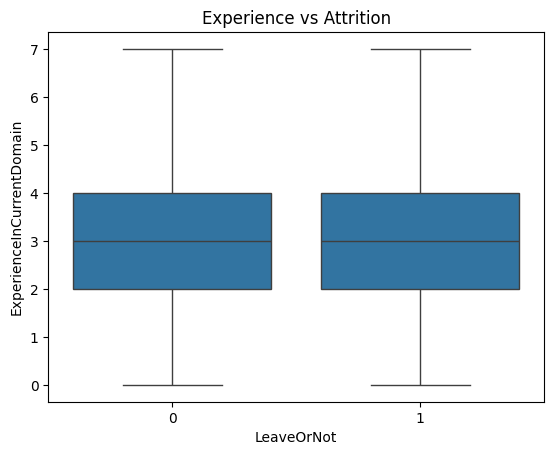

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['LeaveOrNot'], y=df['ExperienceInCurrentDomain'])
plt.title("Experience vs Attrition")
plt.show()


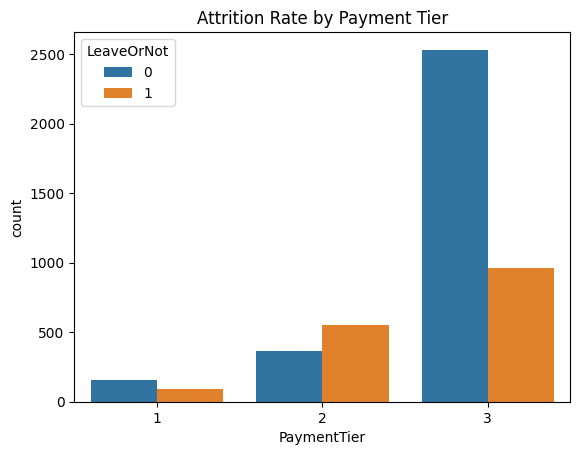

In [11]:
sns.countplot(x=df['PaymentTier'], hue=df['LeaveOrNot'])
plt.title("Attrition Rate by Payment Tier")
plt.show()


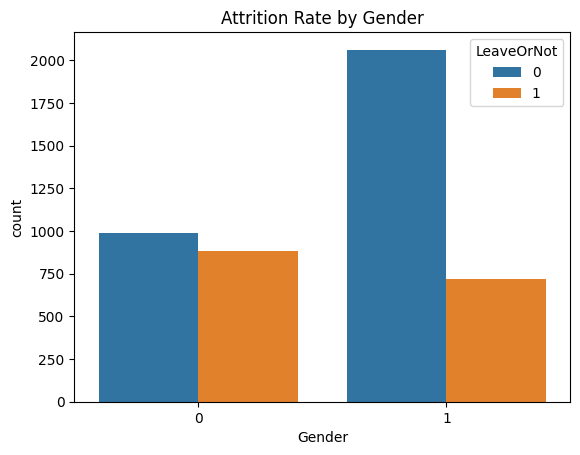

In [12]:
sns.countplot(x=df['Gender'], hue=df['LeaveOrNot'])
plt.title("Attrition Rate by Gender")
plt.show()


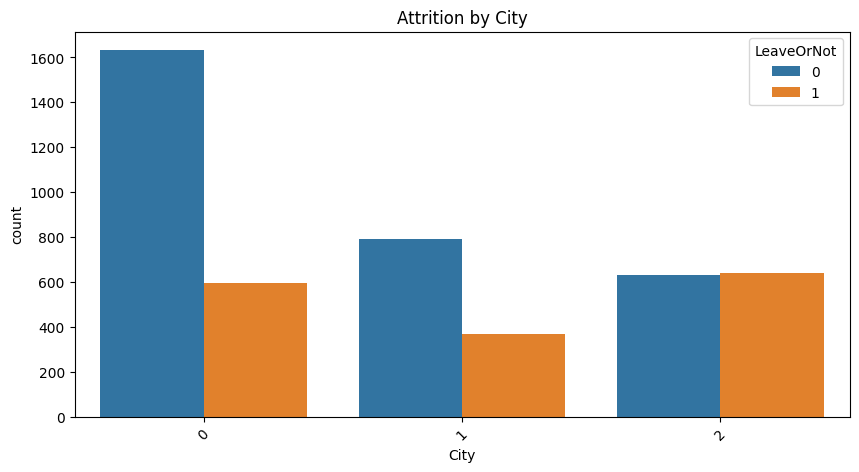

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['City'], hue=df['LeaveOrNot'])
plt.xticks(rotation=45)
plt.title("Attrition by City")
plt.show()
